# Final Model comparison with Simulated Annealing and Hillclimbing

### Imports

In [17]:
import pickle
from utils import *
import matplotlib.pyplot as plt
from itertools import chain

In [19]:
df = pd.read_excel("seating_data.xlsx")
df.set_index("idx", inplace=True)
df.columns = df.columns.astype(int) - 1
df.index = df.index.astype(int) - 1
relationship_matrix = df.values


In [20]:
#We needed to put the wrapper to use it because this mutation use relationship matrix
def greedy_wrapper(repr, mut_prob):
    return greedy_local_replacement_mutation(repr, relationship_matrix, mut_prob)

### Loading best solution

In [21]:
with open("best_solution.pkl", "rb") as f:
    best_solution_ga = pickle.load(f)

In [22]:
for i, table in enumerate(get_tables(best_solution_ga)):
    print(f"Table {i+1}: {table}")

Table 1: [0, 49, 43, 53, 45, 37, 1, 36]
Table 2: [40, 39, 38, 41, 50, 51, 42, 52]
Table 3: [24, 22, 23, 17, 59, 4, 15, 21]
Table 4: [7, 14, 13, 2, 3, 6, 12, 9]
Table 5: [35, 31, 32, 34, 54, 55, 57, 56]
Table 6: [62, 63, 60, 61, 10, 11, 44, 58]
Table 7: [26, 27, 25, 20, 5, 18, 19, 16]
Table 8: [47, 46, 30, 33, 48, 28, 8, 29]


In [23]:
score = fitness(best_solution_ga, relationship_matrix)
print(f"Fitness of loaded solution: {score}")

Fitness of loaded solution: 80600


### Simulated Annealing


--- Run 1 ---
Score: 67200
New best score found: 67200

--- Run 2 ---
Score: 67900
New best score found: 67900

--- Run 3 ---
Score: 68700
New best score found: 68700

--- Run 4 ---
Score: 67100

--- Run 5 ---
Score: 67600

--- Run 6 ---
Score: 67700

--- Run 7 ---
Score: 73700
New best score found: 73700

--- Run 8 ---
Score: 68000

--- Run 9 ---
Score: 68900

--- Run 10 ---
Score: 65100

--- Run 11 ---
Score: 66700

--- Run 12 ---
Score: 69100

--- Run 13 ---
Score: 65000

--- Run 14 ---
Score: 66500

--- Run 15 ---
Score: 70200

--- Run 16 ---
Score: 68600

--- Run 17 ---
Score: 66700

--- Run 18 ---
Score: 70300

--- Run 19 ---
Score: 66600

--- Run 20 ---
Score: 69700

=== Best Result After 20 Runs ===
Best Score: 73700
Best Seating:
[[11, 3, 10, 13, 14, 2, 12, 30], [32, 29, 34, 36, 31, 45, 35, 28], [38, 41, 51, 52, 42, 40, 39, 50], [56, 58, 6, 54, 9, 55, 57, 7], [16, 27, 15, 25, 17, 26, 59, 5], [48, 19, 4, 20, 62, 61, 63, 60], [21, 43, 53, 37, 1, 0, 8, 49], [33, 18, 44, 23, 24, 

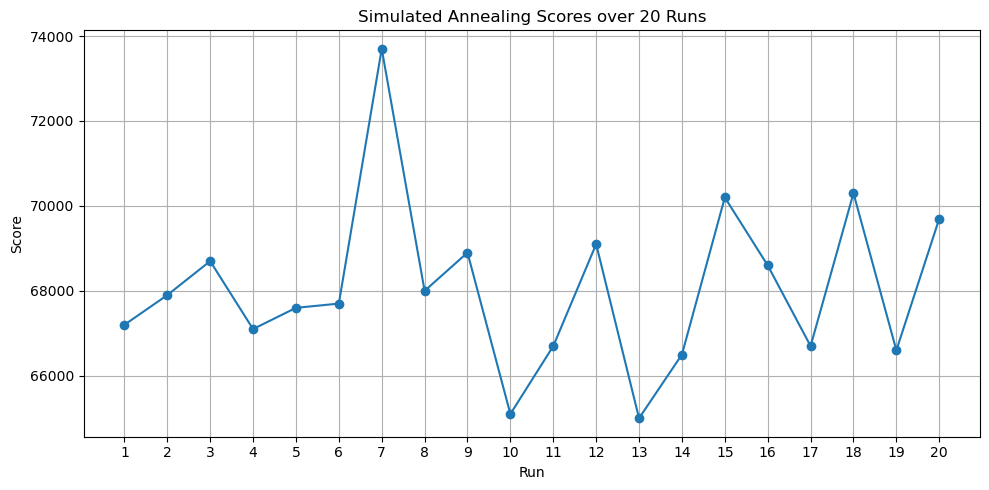

In [38]:
best_score = float('-inf')
best_seating_final = None
scores = []

for run in range(20):
    print(f"\n--- Run {run + 1} ---")
    initial_seating = generate_random_seating()
    best_seating, _ = simulated_annealing(
        relationship_matrix,
        initial_seating,
        max_iter=3000,
        L=50,
        verbose=False
    )

    flattened = list(chain.from_iterable(best_seating))

    solution = {
        'repr': flattened,
        'table_size': 8
    }

    score = fitness(solution, relationship_matrix)
    scores.append(score)
    print(f"Score: {score}")

    if score > best_score:
        best_score = score
        best_seating_final = best_seating
        print(f"New best score found: {best_score}")

# === Best results ===
print("\n=== Best Result After 20 Runs ===")
print(f"Best Score: {best_score}")
print("Best Seating:")
print(best_seating_final)

# === Plotting ===
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), scores, marker='o')
plt.title("Simulated Annealing Scores over 20 Runs")
plt.xlabel("Run")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(range(1, 21))
plt.tight_layout()
plt.show()


### Hillclimbing 


--- Run 1 ---
[Restart 0] Best score so far: 52300.00
[Restart 100] Best score so far: 69300.00
[Restart 200] Best score so far: 73600.00
[Restart 300] Best score so far: 73600.00
[Restart 400] Best score so far: 73600.00
[Restart 500] Best score so far: 73600.00
[Restart 600] Best score so far: 73600.00
[Restart 700] Best score so far: 73600.00
[Restart 800] Best score so far: 73600.00
[Restart 900] Best score so far: 73600.00
Final Hill Climbing Result
Best score found: 73600.00
Table 1: [53, 1, 16, 19, 20, 4, 0, 18]
Table 2: [27, 44, 15, 5, 25, 21, 26, 17]
Table 3: [2, 8, 6, 3, 13, 7, 14, 12]
Table 4: [51, 50, 58, 60, 61, 63, 38, 62]
Table 5: [42, 10, 39, 55, 11, 54, 52, 40]
Table 6: [33, 35, 45, 59, 34, 30, 29, 28]
Table 7: [48, 56, 46, 49, 57, 43, 37, 47]
Table 8: [31, 41, 32, 24, 23, 36, 22, 9]
Score: 73600
New best score found: 73600

--- Run 2 ---
[Restart 0] Best score so far: 55000.00
[Restart 100] Best score so far: 69400.00
[Restart 200] Best score so far: 69400.00
[Restar

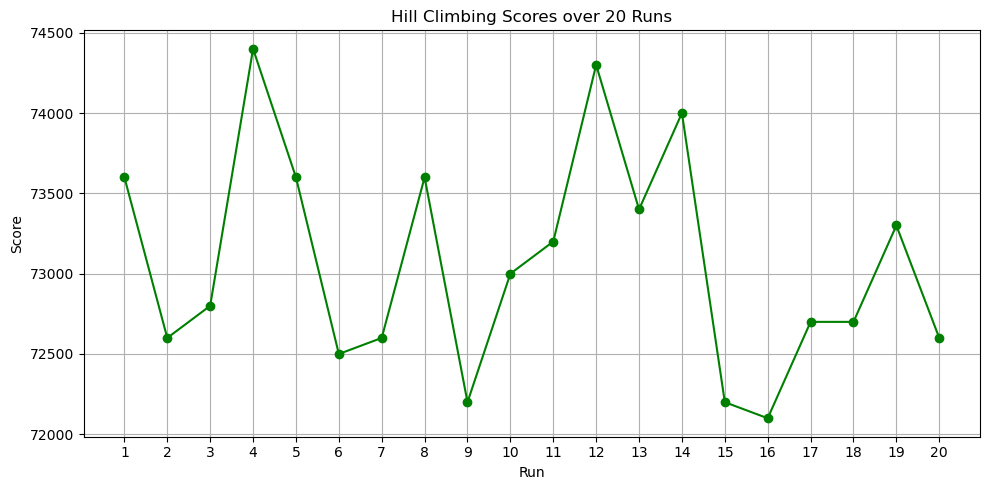

In [39]:
best_score_hc = float('-inf')
best_solution_hc = None
scores_hc = []

for run in range(20):
    print(f"\n--- Run {run + 1} ---")
    hc_solution, hc_score, hc_history = run_hill_climbing(relationship_matrix)
    scores_hc.append(hc_score)
    print(f"Score: {hc_score}")

    if hc_score > best_score_hc:
        best_score_hc = hc_score
        best_solution_hc = hc_solution
        print(f"New best score found: {best_score_hc}")

# === Resultado Final ===
print("\n=== Best Result After 20 Runs ===")
print(f"Best Hill Climbing Score: {best_score_hc}")
print("Best Solution:")
print(best_solution_hc)

# === Gráfico dos Scores ===
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), scores_hc, marker='o', color='green')
plt.title("Hill Climbing Scores over 20 Runs")
plt.xlabel("Run")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(range(1, 21))
plt.tight_layout()
plt.show()


## Conclusions

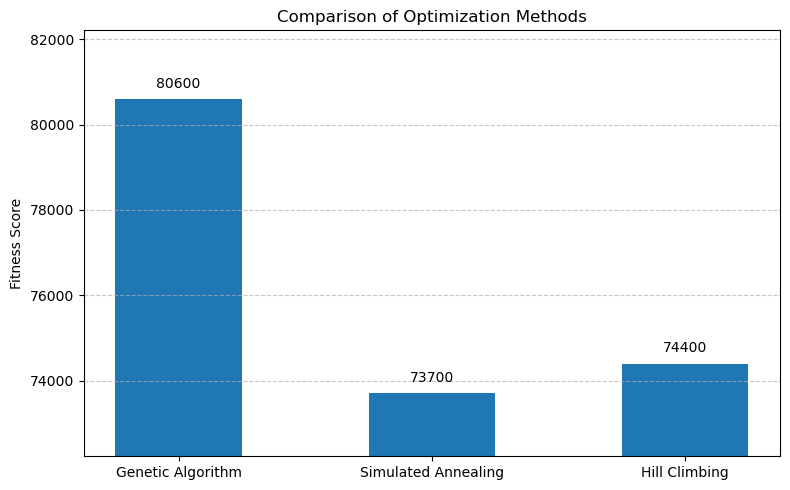

In [44]:
score_ga = fitness(
    {
        "repr": best_solution_ga["repr"],
        "table_size": best_solution_ga["table_size"]
    },
    relationship_matrix
)

# Organizar os scores
scores = {
    "Genetic Algorithm": score_ga,
    "Simulated Annealing": best_score,
    "Hill Climbing": best_score_hc
}

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), width=0.5)
plt.ylabel("Fitness Score")
plt.title("Comparison of Optimization Methods")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(min(scores.values()) * 0.98, max(scores.values()) * 1.02)

# Adicionar valores numéricos acima das barras
for i, (method, score) in enumerate(scores.items()):
    plt.text(i, score + 200, str(score), ha='center', va='bottom')

plt.tight_layout()
plt.show()
